In [1]:
# Defining a function for cleaning the data
def data_cleaning(df):
    
    '''Objective: 
        defining a single function to clean the dataset

    Inputs: 
        df: unplitted and uncleaned dataframe

    Output: 
        fully cleaned dataframe ready for modelling after feature engineering'''
    
    
    # Drop unwanted columns and duplicate values 
    df = df.drop(["Unnamed: 0","auftrag_new_id"], axis=1).drop_duplicates()
    
    # Dealing with missing values filling 'kuendigungs_eingangs_datum' with data extraction date
    # Remove the rest of the Nan's from columns 'ort' and 'email_am_kunden'
    df.kuendigungs_eingangs_datum.fillna(value='2020-05-26', inplace=True)
    df = df.dropna(subset=['ort', 'email_am_kunden'])
    
    # Transforming some columns to have only '0' and '1's 
    df['nl_blacklist_sum']  = df.nl_blacklist_sum.apply(lambda x: 1 if x >0 else 0)
    df['nl_bounced_sum']    = df.nl_bounced_sum.apply(lambda x: 1 if x >0 else 0)
    df['nl_sperrliste_sum'] = df.nl_sperrliste_sum.apply(lambda x: 1 if x >0 else 0)
    df['nl_opt_in_sum']     = df.nl_opt_in_sum.apply(lambda x: 1 if x >0 else 0)
    
    # Renaming the columns to be have consistent name
    df.rename({'openedanzahl_6m':'opened_anzahl_6m',
               'openedanzahl_bestandskunden_6m':'opened_anzahl_bestandskunden_6m',
               'openedanzahl_hamburg_6m': 'opened_anzahl_hamburg_6m',
               'openedanzahl_produktnews_6m': 'opened_anzahl_produktnews_6m',
               'openedanzahl_zeitbrief_6m': 'opened_anzahl_zeitbrief_6m',
               'nl_blacklist_sum': 'nl_blacklist_dum', 
               'nl_bounced_sum': 'nl_bounced_dum', 
               'nl_sperrliste_sum': 'nl_sperrliste_dum',
               'nl_opt_in_sum': 'nl_opt_in_dum'
               }, axis=1, inplace=True)
    
    ## Dropping outlier 
    df.drop(index=df[df["shop_kauf"] >= 100].index, inplace=True)
    df.drop(index=df[df["cnt_abo"] >= 21].index, inplace=True)
    df.drop(index=df[df["received_anzahl_bestandskunden_1w"] >= 4].index, inplace=True)
    df.drop(index=df[df["received_anzahl_produktnews_6m"] >= 14].index, inplace=True)
    df.drop(index=df[df["received_anzahl_hamburg_6m"] >= 130].index, inplace=True)
    df.drop(index=df[df["received_anzahl_zeitbrief_1w"] >= 3].index, inplace=True)
    df.drop(index=df[df["received_anzahl_zeitbrief_1m"] >= 7].index, inplace=True)
    df.drop(index=df[df["received_anzahl_zeitbrief_3m"] >= 16].index, inplace=True)
    df.drop(index=df[df["received_anzahl_zeitbrief_6m"] >= 29].index, inplace=True)
    df.drop(index=df[df["opened_anzahl_zeitbrief_1w"] >= 3].index, inplace=True)
    df.drop(index=df[df["opened_anzahl_zeitbrief_1m"] >= 7].index, inplace=True)
    df.drop(index=df[df["opened_anzahl_zeitbrief_3m"] >= 16].index, inplace=True)
    df.drop(index=df[df["opened_anzahl_zeitbrief_6m"] >= 29].index, inplace=True)
    
    # Dropping open and clickrates anamolies
    df.drop(index=df[df["openrate_bestandskunden_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_bestandskunden_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_bestandskunden_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_bestandskunden_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_bestandskunden_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_bestandskunden_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_produktnews_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_produktnews_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_produktnews_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_produktnews_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_produktnews_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_produktnews_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_hamburg_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_hamburg_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_hamburg_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_hamburg_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_hamburg_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_hamburg_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_zeitbrief_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_zeitbrief_3m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_zeitbrief_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_zeitbrief_1w"] > 1.0].index, inplace=True)
    df.drop(index=df[df["openrate_zeitbrief_1m"] > 1.0].index, inplace=True)
    df.drop(index=df[df["clickrate_zeitbrief_1m"] > 1.0].index, inplace=True)
    
    # Dropping corelated feature columns
    df.drop(['avg_churn', 'ort', 'date_x', 'training_set', 'zon_rawr','zon_community',
             'zon_app_sonstige','zon_schach','zon_blog_kommentare','zon_quiz','zon_boa',
             'zon_kommentar','plz_1','plz_2','cnt_abo_diezeit','cnt_abo_diezeit_digital',
             'cnt_abo_magazin','received_anzahl_1w','received_anzahl_1m','received_anzahl_3m',
             'opened_anzahl_1w','opened_anzahl_1m','opened_anzahl_3m','clicked_anzahl_1w',
             'clicked_anzahl_1m','clicked_anzahl_3m','unsubscribed_anzahl_1w',
             'unsubscribed_anzahl_1m','unsubscribed_anzahl_3m','openrate_1w',
             'clickrate_1w','openrate_1m','clickrate_1m','received_anzahl_bestandskunden_1w',
             'received_anzahl_bestandskunden_1m','received_anzahl_bestandskunden_3m',
             'opened_anzahl_bestandskunden_1w','opened_anzahl_bestandskunden_1m',
             'opened_anzahl_bestandskunden_3m','clicked_anzahl_bestandskunden_1w',
             'clicked_anzahl_bestandskunden_1m','clicked_anzahl_bestandskunden_3m',
             'unsubscribed_anzahl_bestandskunden_1w','unsubscribed_anzahl_bestandskunden_1m',
             'unsubscribed_anzahl_bestandskunden_3m','openrate_bestandskunden_1w',
             'clickrate_bestandskunden_1w','openrate_bestandskunden_1m','clickrate_bestandskunden_1m',
             'received_anzahl_produktnews_1w','received_anzahl_produktnews_1m',
             'received_anzahl_produktnews_3m','opened_anzahl_produktnews_1w',
             'opened_anzahl_produktnews_1m','opened_anzahl_produktnews_3m',
             'clicked_anzahl_produktnews_1w','clicked_anzahl_produktnews_1m',
             'clicked_anzahl_produktnews_3m','unsubscribed_anzahl_produktnews_1w',
             'unsubscribed_anzahl_produktnews_1m','unsubscribed_anzahl_produktnews_3m',
             'openrate_produktnews_1w','clickrate_produktnews_1w','openrate_produktnews_1m',
             'clickrate_produktnews_1m','received_anzahl_hamburg_1w','received_anzahl_hamburg_1m',
             'received_anzahl_hamburg_3m','opened_anzahl_hamburg_1w','opened_anzahl_hamburg_1m',
             'opened_anzahl_hamburg_3m','clicked_anzahl_hamburg_1w','clicked_anzahl_hamburg_1m',
             'clicked_anzahl_hamburg_3m','unsubscribed_anzahl_hamburg_1w',
             'unsubscribed_anzahl_hamburg_1m','unsubscribed_anzahl_hamburg_3m',
             'openrate_hamburg_1w','clickrate_hamburg_1w','openrate_hamburg_1m',
             'clickrate_hamburg_1m','received_anzahl_zeitbrief_1w','received_anzahl_zeitbrief_1m',
             'received_anzahl_zeitbrief_3m','opened_anzahl_zeitbrief_1w','opened_anzahl_zeitbrief_1m',
             'opened_anzahl_zeitbrief_3m','clicked_anzahl_zeitbrief_1w','clicked_anzahl_zeitbrief_1m',
             'clicked_anzahl_zeitbrief_3m','unsubscribed_anzahl_zeitbrief_1w',
             'unsubscribed_anzahl_zeitbrief_1m','unsubscribed_anzahl_zeitbrief_3m',
             'openrate_zeitbrief_1w','clickrate_zeitbrief_1w','openrate_zeitbrief_1m',
             'clickrate_zeitbrief_1m',], axis=1, inplace=True)
    
    return df  

In [2]:
def feature_engineering(df):
    
    '''Objective: 
        defining a single function to incorporate feature engineering

    Inputs: 
        df: cleaned data set from output of the function "data_cleaning()" : 

    Output: 
        fully cleaned and feature engineered dataframe ready for modelling'''
    
    
    # tranform following column into only two values
    relevant = ["zon_zp_grey", "zon_premium", "zon_sonstige", "zon_zp_red"]
    for i in relevant:
        df[i] = df[i].apply(lambda x: 0 if x==0 or x==1 else 1)
        
    # New column created for abonnement with only two values
    df["more_than_one_cnt_abo"] = df["cnt_abo"].apply(lambda x: 0 if x==0 else 1)
   
    # creating additional umwandlungsstatus2 columns
    def dkey(first, second):
        if first == second and second > 0:
            return 1
        else:
            return 0
    df["cnt_dkey_equals_cnt_abo"]     = df.apply(lambda x: dkey(x["cnt_umwandlungsstatus2_dkey"], 
                                                                x["cnt_abo"]), axis=1)
    df["cnt_dkey_more_than_one"]      = df.cnt_umwandlungsstatus2_dkey.apply(lambda x: 1 if x >0 else 0)
    
    # Converting datelike feature to Dtype 'datetime' for future use
    df["kuendigungs_eingangs_datum"]  = pd.to_datetime(df.kuendigungs_eingangs_datum, format="%Y-%m-%d")
    df["liefer_beginn_evt"]           = pd.to_datetime(df.liefer_beginn_evt, format="%Y-%m-%d")
    
    # Creating new columns by tranforming the existing ones
    df["vertragsdauer"]               = df["kuendigungs_eingangs_datum"] - df["liefer_beginn_evt"]
    df["vertragsdauer"]               = df["vertragsdauer"].apply(lambda x: x.days)
    df["abo_registrierung_min"]       = df.abo_registrierung_min.apply(lambda x: x.split()[0])
    df["abo_registrierung_min_year"]  = df.abo_registrierung_min.apply(lambda x: x.split("-")[0])
    df["abo_registrierung_min_month"] = df.abo_registrierung_min.apply(lambda x: x.split("-")[1])
    df["nl_registrierung_min"]        = df.nl_registrierung_min.apply(lambda x: x.split()[0])
    df["nl_registrierung_min_year"]   = df.nl_registrierung_min.apply(lambda x: x.split("-")[0])
    df["nl_registrierung_min_month"]  = df.nl_registrierung_min.apply(lambda x: x.split("-")[1])
    
    # Dropping original feature columns after creation of new columns
    df = df.drop(["abo_registrierung_min", "nl_registrierung_min",
                  "kuendigungs_eingangs_datum", "liefer_beginn_evt", 
                  "lesedauer","cnt_abo", "cnt_umwandlungsstatus2_dkey"], axis=1)
    
    # Dropping highly corelated features to build more general predictive model
    df = remove_collinear_features(df, 0.7)
    
    # Creation of dummy feature columns
    other = ["zon_che_opt_in", "zon_sit_opt_in","zon_zp_grey","zon_premium","zon_sonstige",
             "zon_zp_red","nl_zeitbrief","nl_zeitshop","nl_zeitverlag_hamburg","nl_fdz_organisch"]
    
    categoric_features = list(df.columns[df.dtypes==object]) + other
    df = pd.get_dummies(df, columns=categoric_features, drop_first=True)
    
    # Return the final dataframe
    return df

In [3]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    print(drops)
    x = x.drop(columns=drops)

    return x

# **Churn Prediction 'Die ZEIT'**

## Final results (Voting Classifier): 
**Recall Score: 87.02%**<br/>
**Precision Score: 87.47%**<br/>
**ROC Score: 90.75**%<br/>
**F-beta Score: 87.11**%<br/>

### **Steps:**
- In a first step, the data is cleaned, scaled and some new features are created
- Naive Bayes, RandomForest, Logisitc Regression and XGB Classifier are applied on the data
- Based on these results, the XGB had the best performance 
- In order to use these models in a voting classifier, the single classifiers have been optimized in a further step which led to the final results from the voting classifier


### **Used Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from itertools import combinations

# Library for timing
from time import time

# Ignore warnings while plotting
import warnings
warnings.filterwarnings("ignore")

# Feature Engineering & Selection modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# SUPERVISED LEARNING
# Libraries for classification issues
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Libraries for classification and regression issues
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Libraries for splitting data, hyperparameter tuning & Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Librarie for data balancing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score, precision_recall_curve
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

# Display the whole content of the data frame
pd.set_option('display.max_columns', None)   # Displays all columns
pd.set_option('display.max_rows', None)      # Displays all rows

# Define decimal places shown in the notebook
pd.options.display.float_format = '{:,.3f}'.format
from scipy.stats import uniform
# Visualization
%matplotlib inline
sns.set_style('whitegrid')

### **Read Data and cleaning**

In [2]:
df = pd.read_csv("../00_data/f_chtr_churn_traintable_nf.csv")

**Data Cleaning**

- Removing Outliers and features, we don't need for the modelling (e.g. ```Unnamed: 0, auftrag_new_id, ort```) 
- And those, which are highly correlated (e.g.```received_anzahl_produktnews_1m' and received_anzahl_produktnews_3m```)

In [6]:
df = data_cleaning(df)

In [7]:
# Numeric and categorical features
shape_init_rows = df.shape[0]
shape_init_cols = df.shape[1]

print('The shape of the data set: {0} rows, {1} columns'.format(shape_init_rows, shape_init_cols))
print('   ')

cont_f = df.select_dtypes(include=['float64', 'int64'])
print('The number of numeric features: {0}'.format(len(cont_f.columns)))

cat_f = df.select_dtypes(include="object")
print('The number of objectlike features: {0}'.format(len(cat_f.columns)))

The shape of the data set: 156428 rows, 72 columns
   
The number of numeric features: 59
The number of objectlike features: 13


**Feature Engineering**

- New features are introduced  (mainly date related)
- Dummies are created 
- Features, which are still highly correlated, are dropped

In [8]:
df = feature_engineering(df)

openrate_bestandskunden_3m | opened_anzahl_bestandskunden_6m | 0.88
clickrate_bestandskunden_3m | clicked_anzahl_bestandskunden_6m | 0.88
opened_anzahl_produktnews_6m | received_anzahl_produktnews_6m | 0.78
openrate_produktnews_3m | opened_anzahl_produktnews_6m | 0.76
clickrate_produktnews_3m | clicked_anzahl_produktnews_6m | 0.77
received_anzahl_hamburg_6m | nl_zeitverlag_hamburg | 0.92
opened_anzahl_hamburg_6m | received_anzahl_hamburg_6m | 0.7
openrate_hamburg_3m | opened_anzahl_hamburg_6m | 0.99
openrate_zeitbrief_3m | opened_anzahl_zeitbrief_6m | 0.96
cnt_dkey_more_than_one | more_than_one_cnt_abo | 0.74
{'clickrate_produktnews_3m', 'openrate_bestandskunden_3m', 'opened_anzahl_produktnews_6m', 'openrate_produktnews_3m', 'received_anzahl_hamburg_6m', 'opened_anzahl_hamburg_6m', 'openrate_zeitbrief_3m', 'cnt_dkey_more_than_one', 'openrate_hamburg_3m', 'clickrate_bestandskunden_3m'}


## **Modeling**
### **Data Selection**
+ y = Target variable -->>. ```churn```
+ X = Predictors -->> ```remaining columns```

In [11]:
X = df.drop('churn',axis=1)
y = df['churn']

In [12]:
print('The target variable (y) has {0} rows.'.format(y.shape[0]))
print('   ')
print('The predictor variables (X) have {0} rows and {1} columns.'.format(X.shape[0], X.shape[1]))

The target variable (y) has 156428 rows.
   
The predictor variables (X) have 156428 rows and 885 columns.


#### **Train-Test-Split**

In [13]:
# Splitting the data 
test_size = 0.3
RSEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = RSEED)

#### Scaling the numeric features

In [54]:
numeric_features = ['vertragsdauer','shop_kauf', "nl_aktivitaet",'received_anzahl_6m','clicked_anzahl_6m','unsubscribed_anzahl_6m','openrate_3m','clickrate_3m',
 'received_anzahl_bestandskunden_6m','clicked_anzahl_bestandskunden_6m','unsubscribed_anzahl_bestandskunden_6m','received_anzahl_produktnews_6m','clicked_anzahl_produktnews_6m',
 'unsubscribed_anzahl_produktnews_6m','clicked_anzahl_hamburg_6m','unsubscribed_anzahl_hamburg_6m','clickrate_hamburg_3m','received_anzahl_zeitbrief_6m','clicked_anzahl_zeitbrief_6m',
 'unsubscribed_anzahl_zeitbrief_6m','clickrate_zeitbrief_3m']

In [16]:
scaler = StandardScaler()

# if you scale every column, do scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# if you scale every column, do scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test[numeric_features])

# if you scale every column, you can skip this part
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(numeric_features, axis=1)], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(numeric_features, axis=1)], axis=1)

#### Defining a function for prediction

In [17]:
def predict(X_train, X_test, y_train, y_test, model, balance=None):
    
    '''
    inputs:
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
       - model: the model algorithm to be trained and predicted on
       - balance: None defualt. "over" == oversampling, "under" == undersampling
     '''
    
    results = {}
    
    # Balancing
    if balance == None:
        X_train, y_train = X_train, y_train
        print("Balance None")
    elif balance == "over":
        print("Balance over")
        ros = RandomOverSampler(random_state=0)
        X_train, y_train = ros.fit_resample(X_train, y_train)
    elif balance == "under":
        print("Balance under")
        rus = RandomUnderSampler(random_state=0)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        
        
    # Fit the learner to the training data 
    start = time() # Get start time
    model = model.fit(X_train ,y_train)
    end = time() # Get end time
      
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set and training set,
    start = time() # Get start time
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    predictions_test_prob = model.predict_proba(X_test)
    predictions_train_prob = model.predict_proba(X_train)
    end = time() # Get end time
    
    '''
    Evaluation through different parameters
    '''
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute accuracy on the train set
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute Precision_score on the train set
    results['Precision_train'] = precision_score(y_train, predictions_train)
    
    # Compute Precision_score on the test set
    results['Precision_test'] = precision_score(y_test, predictions_test)
    
    # Compute Recall_score on the train set
    results['Recall_train'] = recall_score(y_train ,predictions_train)
    
    # Compute Recall_score on the test set
    results['Recall_test'] = recall_score(y_test, predictions_test)
    
    # Final results
    print ("{} trained .".format(model.__class__.__name__))
    
    print(f"{model.__class__.__name__}: classification report:")
    print(classification_report(y_test, predictions_test))
    print("-"*50)
    
    # Return the results
    return results

**Baseline models**

In [18]:
model_A = GaussianNB(var_smoothing=1e-09)

model_B = RandomForestClassifier(n_estimators=500, min_samples_split = 2, 
                               max_leaf_nodes = 50, max_depth = 25, 
                               bootstrap = True, max_features = 'auto',   
                               n_jobs=-1, verbose = 1, random_state=RSEED)

model_C = XGBClassifier(n_estimators = 200, gamma = 100, 
                      learning_rate = 0.01, max_depth = 12, booster = 'gbtree',
                      scale_pos_weight = 1.5, objective='binary:logistic')

model_D = LogisticRegression()


results = {}
for model in [model_A, model_B, model_C, model_D]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = \
    predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, model, balance="over")

Balance over
GaussianNB trained .
GaussianNB: classification report:
              precision    recall  f1-score   support

           0       0.77      0.30      0.43     32528
           1       0.33      0.80      0.47     14401

    accuracy                           0.45     46929
   macro avg       0.55      0.55      0.45     46929
weighted avg       0.64      0.45      0.44     46929

--------------------------------------------------
Balance over


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   47.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.2s finis

RandomForestClassifier trained .
RandomForestClassifier: classification report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     32528
           1       0.55      0.65      0.60     14401

    accuracy                           0.73     46929
   macro avg       0.69      0.71      0.70     46929
weighted avg       0.75      0.73      0.74     46929

--------------------------------------------------
Balance over
XGBClassifier trained .
XGBClassifier: classification report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     32528
           1       0.60      0.80      0.68     14401

    accuracy                           0.77     46929
   macro avg       0.75      0.78      0.75     46929
weighted avg       0.80      0.77      0.78     46929

--------------------------------------------------
Balance over
LogisticRegression trained .
LogisticRegression: classification report:
    

In [23]:
# Displaying the results of predictions
for i in results.items():
    print (i[0])
    display(pd.DataFrame.from_dict(i[1], orient='index').rename(columns={0:'cleaned and balanced data'}))

GaussianNB


,cleaned and balanced data
train_time,2.241
pred_time,6.524
acc_train,0.565
acc_test,0.451
Precision_train,0.543
Precision_test,0.334
Recall_train,0.824
Recall_test,0.797


RandomForestClassifier


,cleaned and balanced data
train_time,47.652
pred_time,6.092
acc_train,0.711
acc_test,0.732
Precision_train,0.743
Precision_test,0.554
Recall_train,0.645
Recall_test,0.645


XGBClassifier


,cleaned and balanced data
train_time,443.173
pred_time,6.820
acc_train,0.789
acc_test,0.774
Precision_train,0.779
Precision_test,0.599
Recall_train,0.807
Recall_test,0.799


LogisticRegression


,cleaned and balanced data
train_time,9.650
pred_time,0.130
acc_train,0.720
acc_test,0.708
Precision_train,0.709
Precision_test,0.517
Recall_train,0.747
Recall_test,0.747


Based on the results of the basline models, none of them performs well euqally for both recall and precision.<br/> Let's try to optimize the single models

## Optimizing the models

### GaussianNB

In [40]:
# Initialize the two models
model_A = GaussianNB(var_smoothing=1e-20)


results = {}
for model in [model_A]:#, model_B, model_C, model_D]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = \
    predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, model, balance="over")

Balance over
GaussianNB trained .
GaussianNB: classification report:
              precision    recall  f1-score   support

           0       0.80      0.12      0.21     32528
           1       0.32      0.93      0.48     14401

    accuracy                           0.37     46929
   macro avg       0.56      0.53      0.35     46929
weighted avg       0.65      0.37      0.29     46929

--------------------------------------------------


### Logistic Regression

In [41]:
model_A = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=1.5, random_state=None, solver='lbfgs', max_iter=100, 
                             multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

results = {}
for model in [model_A]:#, model_B, model_C, model_D]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = \
    predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, model, balance="over")

Balance over
LogisticRegression trained .
LogisticRegression: classification report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     32528
           1       0.52      0.75      0.61     14401

    accuracy                           0.71     46929
   macro avg       0.69      0.72      0.69     46929
weighted avg       0.75      0.71      0.72     46929

--------------------------------------------------


### XGBoost

In [24]:
model_A = XGBClassifier()

model_B = XGBClassifier(scale_pos_weight=2.5, 
                        objective="binary:logistic", 
                        max_delta_step=10, 
                        max_depth=3, 
                        eta=0.8)

model_C = XGBClassifier(scale_pos_weight=0.5, 
                      objective="binary:logistic", 
                      max_delta_step=10, 
                      max_depth=20, 
                      eta=0.5, 
                      learning_rate=0.001,
                      gamma=0.5,
                      colsample_bytree=0.6,
                      colsample_bylevel=0.9,
                      min_child_weight=3.0,
                      n_estimators=300,
                      reg_lambda=50.0,
                      silent=False,
                      subsample=0.6
                      )

model_D = XGBClassifier(scale_pos_weight=1.95, eta=0.8, max_depth=11, sampling_method="gradient_based")

results = {}
for model in [model_A, model_B, model_C, model_D]:
    model_name = model
    results[model_name] = {}
    results[model_name] = \
    predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, model, balance="over")

Balance over
XGBClassifier trained .
XGBClassifier: classification report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     32528
           1       0.82      0.77      0.79     14401

    accuracy                           0.88     46929
   macro avg       0.86      0.85      0.85     46929
weighted avg       0.87      0.88      0.88     46929

--------------------------------------------------
Balance over
XGBClassifier trained .
XGBClassifier: classification report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.76     32528
           1       0.53      0.90      0.67     14401

    accuracy                           0.72     46929
   macro avg       0.73      0.77      0.72     46929
weighted avg       0.81      0.72      0.73     46929

--------------------------------------------------
Balance over
[15:19:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work

**Findings:** The results above show, that the XGBClassifiers have the best performance. In a next step, we will try to combine these classifiers in a voting classifier

## Voting Classifier

Here, a voting classifier is introduced. Several voting classifier have been applied, trying to get the best balance between precision and recall.

#### **1. Focus on recall**

In [48]:
model_B = GaussianNB(var_smoothing=1e-20)

model_E = XGBClassifier(scale_pos_weight=2.5, 
                        objective="binary:logistic", 
                        max_delta_step=10, 
                        max_depth=3, 
                        eta=0.3)

model_G = XGBClassifier(scale_pos_weight=1.95, eta=0.8, max_depth=11, sampling_method="gradient_based")

voting_clf = VotingClassifier(estimators = [('NB', model_B),
                                            ('XGB_rec', model_E),
                                            ('XGB_balance',model_G)], 
                              voting = 'soft', weights=[3,3,12])


predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, voting_clf, balance="over")

Balance over
VotingClassifier trained .
VotingClassifier: classification report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     32528
           1       0.80      0.87      0.83     14401

    accuracy                           0.89     46929
   macro avg       0.87      0.89      0.88     46929
weighted avg       0.90      0.89      0.89     46929

--------------------------------------------------


{'train_time': 270.99007058143616,
 'pred_time': 15.435029983520508,
 'acc_train': 0.9871928942073493,
 'acc_test': 0.8924545590146817,
 'Precision_train': 0.9760577408130796,
 'Precision_test': 0.798849840255591,
 'Recall_train': 0.9988880652335063,
 'Recall_test': 0.8681341573501841}

#### **2. More focus on precision**

In [49]:
model_A = XGBClassifier(scale_pos_weight=0.5, 
                      objective="binary:logistic", 
                      max_delta_step=10, 
                      max_depth=20, 
                      eta=0.5, 
                      learning_rate=0.001,
                      gamma=0.5,
                      colsample_bytree=0.6,
                      colsample_bylevel=0.9,
                      min_child_weight=3.0,
                      n_estimators=300,
                      reg_lambda=50.0,
                      silent=False,
                      subsample=0.6
                      )

model_E = XGBClassifier(scale_pos_weight=2.5, 
                        objective="binary:logistic", 
                        max_delta_step=10, 
                        max_depth=3, 
                        eta=0.3)


model_G = XGBClassifier(scale_pos_weight=1.95, eta=0.8, max_depth=11, sampling_method="gradient_based")


voting_clf = VotingClassifier(estimators = [('XGB_prec', model_A),
                                            ('XGB_rec', model_E),
                                            ('XGB_balance',model_G)], 
                              voting = 'soft', weights=[6,7,12])

predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, voting_clf, balance="over")

Balance over
[16:18:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


VotingClassifier trained .
VotingClassifier: classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     32528
           1       0.84      0.85      0.84     14401

    accuracy                           0.90     46929
   macro avg       0.89      0.89      0.89     46929
weighted avg       0.90      0.90      0.90     46929

--------------------------------------------------


{'train_time': 796.8425359725952,
 'pred_time': 17.26840591430664,
 'acc_train': 0.9911640898019697,
 'acc_test': 0.9034072748194081,
 'Precision_train': 0.984804337884628,
 'Precision_test': 0.8368377935554342,
 'Recall_train': 0.9977231811924177,
 'Recall_test': 0.851190889521561}

**Results:** This improved the precision

#### **3. Only two XGBClassifiers: one optimized on recall - the other on precision**

In [50]:
model_E = XGBClassifier(scale_pos_weight=0.2, 
                      objective="binary:logistic", 
                      max_delta_step=10, 
                      max_depth=20, 
                      eta=0.5, 
                      learning_rate=0.001,
                      gamma=0.5,
                      colsample_bytree=0.6,
                      colsample_bylevel=0.9,
                      min_child_weight=3.0,
                      n_estimators=300,
                      reg_lambda=50.0,
                      silent=False,
                      subsample=0.6
                      )

model_G = XGBClassifier(scale_pos_weight=1.95, eta=0.8, max_depth=11, sampling_method="gradient_based")

voting_clf = VotingClassifier(estimators = [('XGB_prec', model_E),
                                            ('XGB_best', model_G),], 
                              voting = 'soft', weights=[1, 3.5])

predict(X_train_preprocessed, X_test_preprocessed, y_train, y_test, voting_clf, balance="over")

Balance over
[16:32:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


VotingClassifier trained .
VotingClassifier: classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     32528
           1       0.87      0.83      0.85     14401

    accuracy                           0.91     46929
   macro avg       0.90      0.89      0.89     46929
weighted avg       0.91      0.91      0.91     46929

--------------------------------------------------


{'train_time': 468.48758912086487,
 'pred_time': 13.124792098999023,
 'acc_train': 0.9958699565815948,
 'acc_test': 0.9096933665750389,
 'Precision_train': 0.9937523066378446,
 'Precision_test': 0.8673993203672908,
 'Recall_train': 0.9980144022026898,
 'Recall_test': 0.8330671481147143}

**Result:** This seems to be a good balance between the two metrics!

## Summary: Best models

Let's have a look at the best models so far and visualize the results

### First one in the simple XGB Classifier

In [19]:
ros=RandomOverSampler(random_state=420)
X_train_preprocessed_balanced, y_train_balanced = ros.fit_resample(X_train_preprocessed, y_train)

In [20]:
model_xgb_best = XGBClassifier(scale_pos_weight=1.95, eta=0.8, max_depth=11, 
                               sampling_method="gradient_based").fit(X_train_preprocessed_balanced, y_train_balanced)

In [21]:
y_pred_xgb = model_xgb_best.predict(X_test_preprocessed)
y_pred_xgb_proba = model_xgb_best.predict_proba(X_test_preprocessed)

In [22]:
print("Recall Score:", round(recall_score(y_test, y_pred_xgb)*100, 3),"%")
print("Precision Score:", round(precision_score(y_test, y_pred_xgb)*100, 3),"%")
print("ROC Score:", round(roc_auc_score(y_test, y_pred_xgb)*100, 3),"%")
print("F-beta Score:", round(fbeta_score(y_test, y_pred_xgb, beta=2)*100, 3),"%")

Recall Score: 83.925 %
Precision Score: 85.674 %
ROC Score: 88.856 %
F-beta Score: 84.269 %


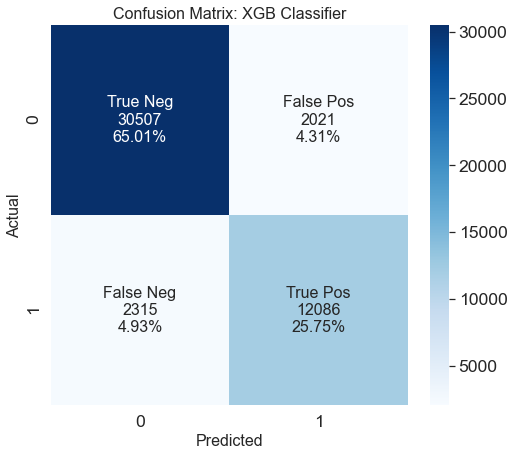

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix: XGB Classifier', fontsize = 16); # title with fontsize 20
plt.xlabel('Predicted', fontsize = 16);
plt.ylabel('Actual', fontsize = 16);
#plt.savefig('plots/confusion_matrix_Voting_Classifier_5classifier_soft.png',dpi=300)

In [27]:
# write results to dataframe
results_xgb = pd.DataFrame()
results_xgb["voting"] = y_pred_xgb_proba[:,1]
results_xgb["Target"] = y_test.values

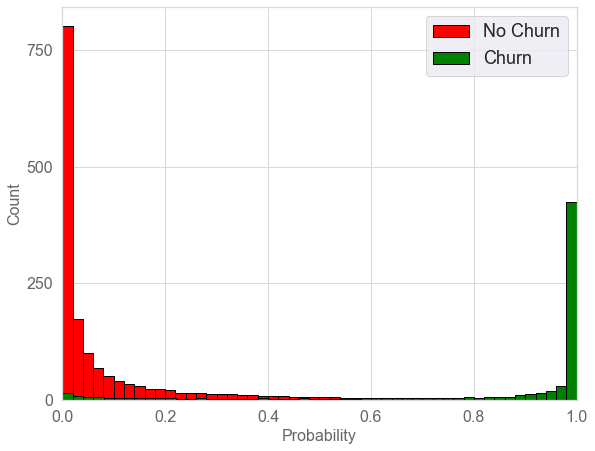

In [28]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(9, 7), nrows=1, ncols = 1)
counter = 0
key = "voting"

sns.set(font_scale=2.6)

# Get predictions
#y_pred = results[key]

# Get AUC
#auc = roc_auc_score(y_test, y_pred)
#textstr = f"AUC: {auc:.3f}"

# Plot false distribution
false_pred = results_xgb[results_xgb["Target"] == 0]
sns.distplot(false_pred[key], hist=True, kde=False, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'black', 'alpha': 1.0}, label='No Churn')

# Plot true distribution
true_pred = results_xgb[results_xgb["Target"] == 1]
b = sns.distplot(true_pred[key], hist=True, kde=False, 
             bins=int(50), color = 'green',
             hist_kws={'edgecolor':'black', 'alpha': 1.0},label='Churn')

#b.set_yticklabels(b.get_yticks(), size = 16)
#b.set_xticklabels(b.get_xticks(), size = 16)

# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#                verticalalignment = "top", bbox=props)

# Set axis limits and labels
#ax.set_title(f"{key} Distribution")
ax.set_xlim(0,1)
ax.set_xlabel("Probability",fontsize=16)
ax.set_ylabel("Count",fontsize=16)

ax.set_yticklabels([0,250,500,750,1000,1250],fontsize=16)
ax.set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
#ax.set_ylabel("Count",fontsize=16)

ax.legend(fontsize=18)

# Tight layout
plt.tight_layout()

# Save Figure
#plt.savefig("plots/Probability_Distribution_Voting_Classifiert_soft_alone.png", dpi = 300)

In [29]:
ROC_AUC_xgb = roc_auc_score(y_test, y_pred_xgb)
ROC_curve_xgb = roc_curve(y_test, y_pred_xgb)
PR_curve_xgb = precision_recall_curve(y_test, y_pred_xgb)

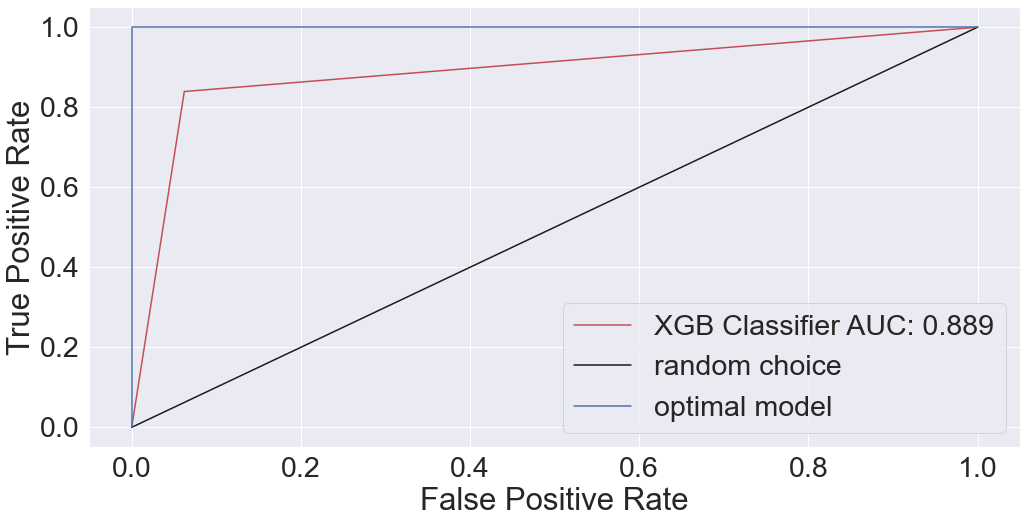

In [30]:
f, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols = 1)
plt.plot(ROC_curve_xgb[0],ROC_curve_xgb[1],'r-',label = 'XGB Classifier AUC: %.3f'%float(ROC_AUC_xgb))
plt.plot([0,1],[0,1],'k-',label='random choice')
plt.plot([0,0,1,1],[0,1,1,1],'b-',label='optimal model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Tight layout
plt.tight_layout()

# Save Figure
#plt.savefig("plots/Probability_Distribution_voting_classifier_soft_ROC_AUC.png", dpi = 300)

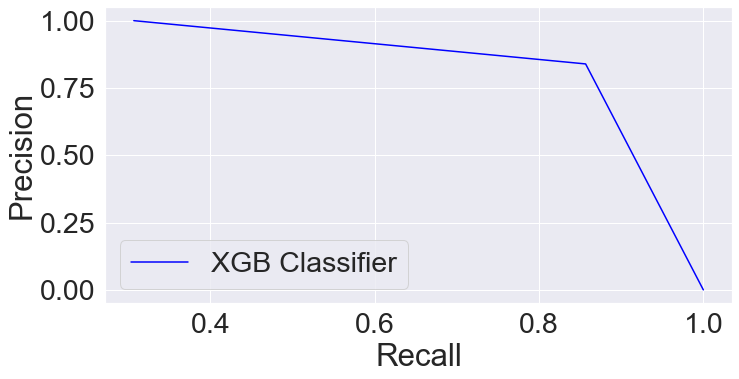

In [31]:
recall_score(y_test, y_pred_xgb)

f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
plt.plot(PR_curve_xgb[0], PR_curve_xgb[1],'r-',label = 'XGB Classifier',color='blue')

#plt.vlines(recall_score(y_test, y_pred_xgb), 1, 1,linestyles='dashed', label = 'Recall (default threshold)')

plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim(0,1.0)
#plt.xlim(0,1.0)

# Tight layout
plt.tight_layout()

# Save Figure
#plt.savefig("plots/Probability_Distribution_voting_classifier_soft_Precision_Recall_Curve.png", dpi = 300)

### Second one is a voting classifier with optimized models

In [61]:
model_1 = XGBClassifier(scale_pos_weight=2.4700000000000006, eta=0.8, max_depth=16, 
                        sampling_method="gradient_based")



model_2 = XGBClassifier(scale_pos_weight=2.38, eta=0.8, max_depth=11, 
                        sampling_method="gradient_based")


model_3 = XGBClassifier(scale_pos_weight=1.95, eta=0.8, max_depth=16, 
                        sampling_method="gradient_based")

voting_clf_final = VotingClassifier(estimators = [('ROC', model_1),
                                            ('Rec', model_2),
                                            ('Prec',model_3)], 
                              voting = 'soft')

In [62]:
voting_clf_final.fit(X_train_preprocessed_balanced, y_train_balanced)

VotingClassifier(estimators=[('ROC',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, eta=0.8,
                                            gamma=None, gpu_id=None,
                                            importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=16,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimat...
                                            learning_rate=None,
                                            max_del

In [63]:
y_pred_voting_final = voting_clf_final.predict(X_test_preprocessed)
y_pred_voting_final_prob = voting_clf_final.predict_proba(X_test_preprocessed)

In [64]:
print("Recall Score:", round(recall_score(y_test, y_pred_voting_final)*100, 3),"%")
print("Precision Score:", round(precision_score(y_test, y_pred_voting_final)*100, 3),"%")
print("ROC Score:", round(roc_auc_score(y_test, y_pred_voting_final)*100, 3),"%")
print("F-beta Score:", round(fbeta_score(y_test, y_pred_voting_final, beta=2)*100, 3),"%")

Recall Score: 83.321 %
Precision Score: 92.336 %
ROC Score: 90.129 %
F-beta Score: 84.98 %


We will slightly lower the threshold in order to get a better recall:

In [67]:
y_pred_tuned_voting_final = (y_pred_voting_final_prob >= 0.38)[:,1]

In [68]:
print("Recall Score (threshold chenged):", round(recall_score(y_test, y_pred_tuned_voting_final)*100, 3),"%")
print("Precision Score (threshold chenged):", round(precision_score(y_test, y_pred_tuned_voting_final)*100, 3),"%")
print("ROC Score (threshold chenged):", round(roc_auc_score(y_test, y_pred_tuned_voting_final)*100, 3),"%")
print("F-beta Score (threshold chenged):", round(fbeta_score(y_test, y_pred_tuned_voting_final, beta=2)*100, 3),"%")

Recall Score (threshold chenged): 87.022 %
Precision Score (threshold chenged): 87.471 %
ROC Score (threshold chenged): 90.752 %
F-beta Score (threshold chenged): 87.111 %


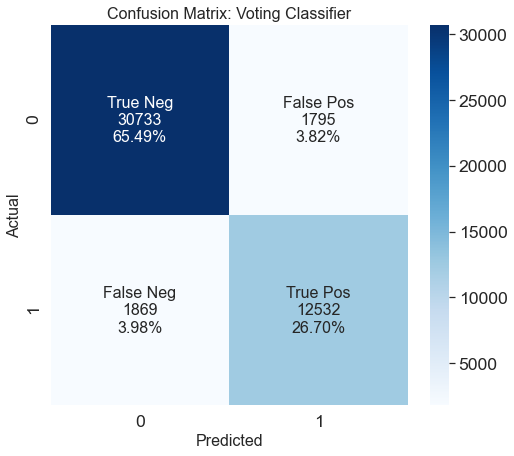

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred_tuned_voting_final)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix: Voting Classifier', fontsize = 16); # title with fontsize 20
plt.xlabel('Predicted', fontsize = 16);
plt.ylabel('Actual', fontsize = 16);
#plt.savefig('plots/confusion_matrix_Voting_Classifier_5classifier_soft.png',dpi=300)

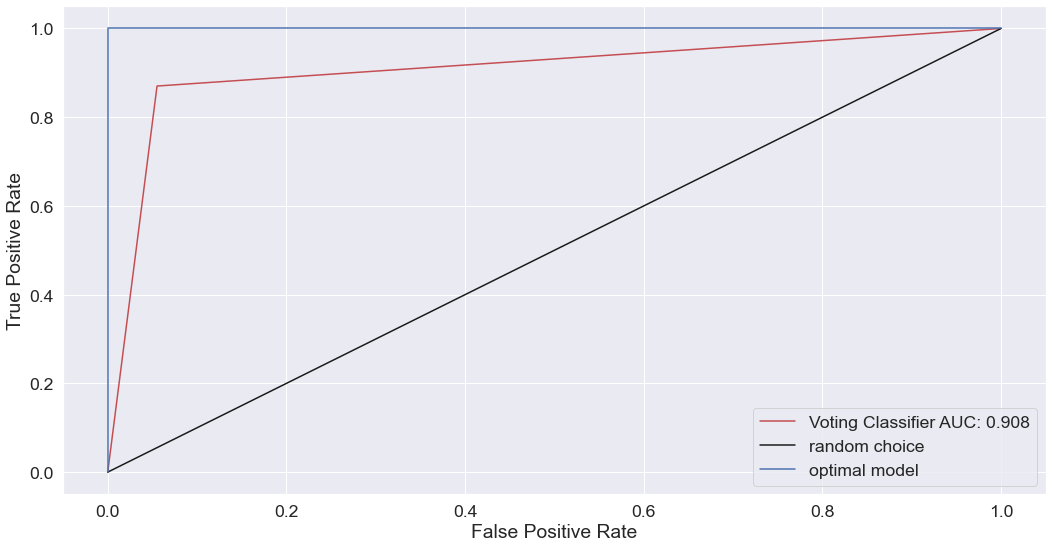

In [71]:
ROC_AUC_best = roc_auc_score(y_test, y_pred_tuned_voting_final)
ROC_curve_best = roc_curve(y_test, y_pred_tuned_voting_final)
PR_curve_best = precision_recall_curve(y_test, y_pred_tuned_voting_final)

f, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols = 1)
plt.plot(ROC_curve_best[0],ROC_curve_best[1],'r-',label = 'Voting Classifier AUC: %.3f'%float(ROC_AUC_best))
plt.plot([0,1],[0,1],'k-',label='random choice')
plt.plot([0,0,1,1],[0,1,1,1],'b-',label='optimal model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Tight layout
plt.tight_layout()

# Save Figure
#plt.savefig("plots/Probability_Distribution_voting_classifier_soft_ROC_AUC.png", dpi = 300)

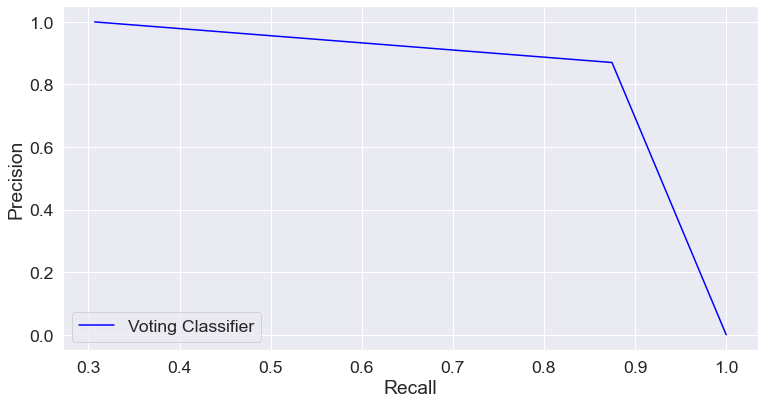

In [73]:
recall_score(y_test, y_pred_tuned_voting_final)

f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
plt.plot(PR_curve_best[0], PR_curve_best[1],'r-',label = 'Voting Classifier',color='blue')

#plt.vlines(recall_score(y_test, y_pred_xgb), 1, 1,linestyles='dashed', label = 'Recall (default threshold)')

plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim(0,1.0)
#plt.xlim(0,1.0)

# Tight layout
plt.tight_layout()

# Save Figure
#plt.savefig("plots/Probability_Distribution_voting_classifier_soft_Precision_Recall_Curve.png", dpi = 300)

## Visualizing the results


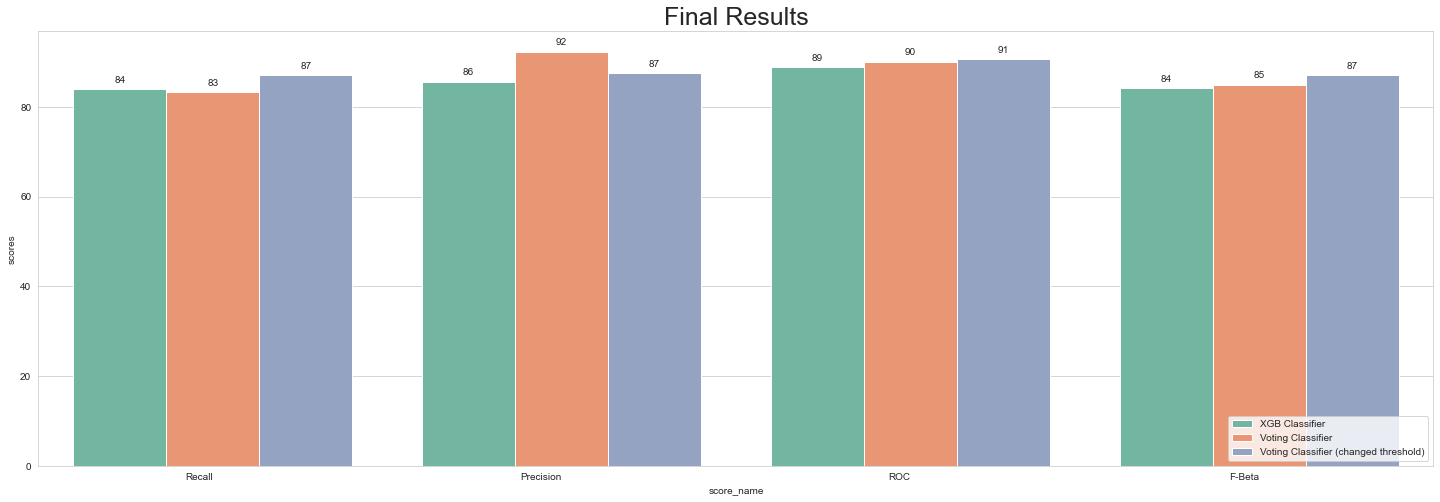

In [4]:
results =  {'scores': [83.925 , 85.674,88.856, 84.269 , 83.321, 92.336 , 90.129, 84.98, 87.022, 87.471, 90.752, 87.111], 
            'score_name': ["Recall", "Precision", "ROC", "F-Beta", "Recall", "Precision", "ROC", "F-Beta", "Recall", "Precision", "ROC", "F-Beta"], 
              'model': ["XGB Classifier", "XGB Classifier", "XGB Classifier", "XGB Classifier", "Voting Classifier", 
                        "Voting Classifier", "Voting Classifier", "Voting Classifier", "Voting Classifier (changed threshold)", 
                        "Voting Classifier (changed threshold)", "Voting Classifier (changed threshold)", "Voting Classifier (changed threshold)"]}

results_df = df = pd.DataFrame(data=results)

plt.figure(figsize=(25,8), frameon=False)
f3 = sns.barplot(data=results_df, x="score_name", y="scores", hue="model", palette="Set2")
f3.set_title("Results", fontsize=20);
for p in f3.patches:
    f3.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
plt.legend(loc='lower right');
plt.title("Final Results", fontsize=25)
f3.set_xticklabels(f3.get_xticklabels(),rotation=0, ha="right");
plt.savefig('00_plots/digi_since.png', transparent = True)

### Feature Importance

In [44]:
sorted_idx = model_xgb_best.feature_importances_.argsort()
sorted_idx = sorted_idx[-20:][::-1]

Text(0.5, 1.0, 'Xgboost Feature Importance')

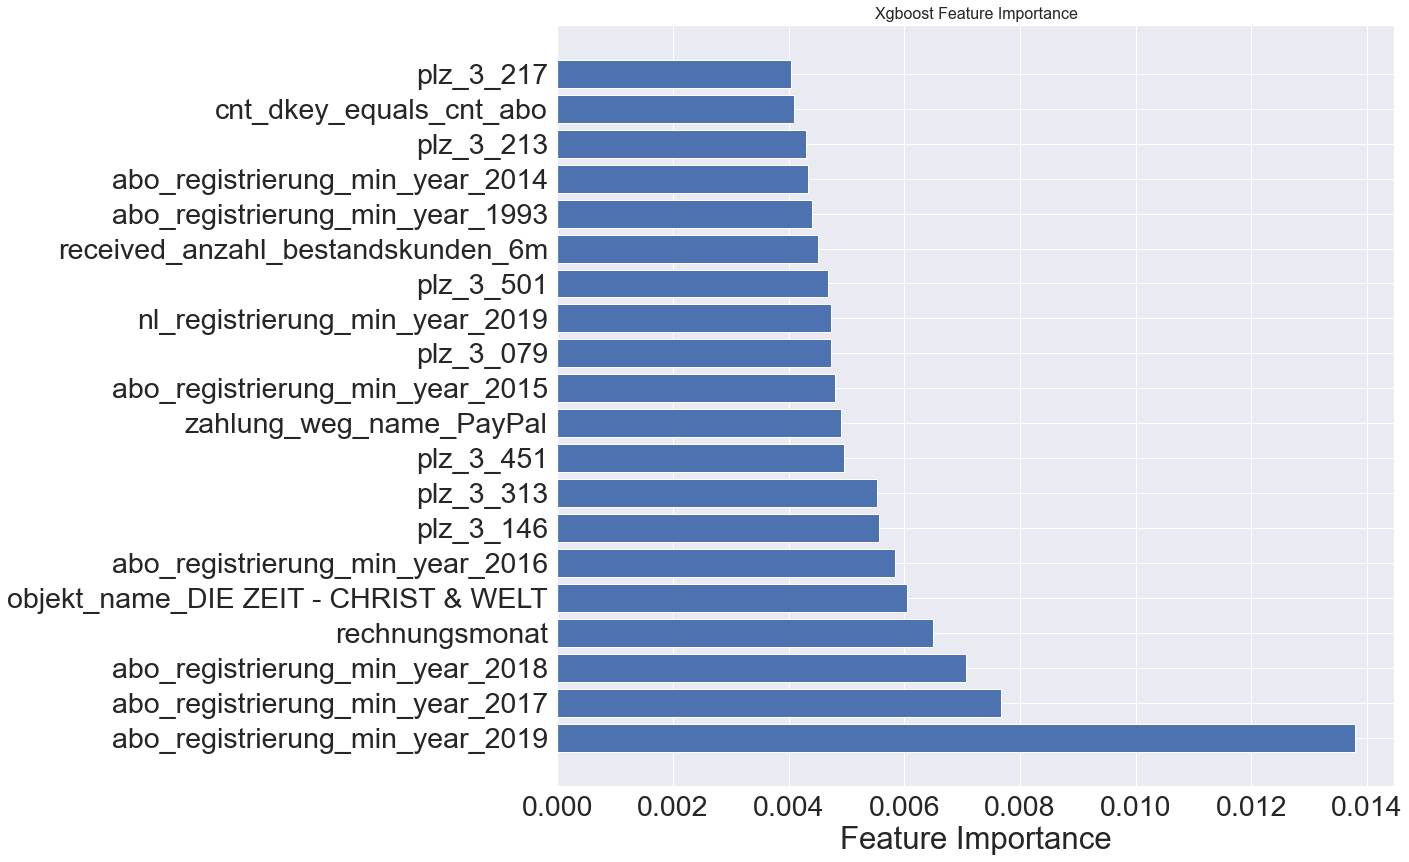

In [45]:
plt.figure(figsize=(15,14))
plt.barh(X_train.columns[sorted_idx], model_xgb_best.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance");
plt.title("Xgboost Feature Importance", fontsize=16)